# A graph representation of the Web

There are multiple way we could repressent the World Wide Web, but since the web is consisted of multiple html pages being linked together, a clever way would be a directed graph.

A graph is an ordered pair $G = (V, E)$, where $V$ is the set of vertices in the graph, and $E = \{(x,y) \vert x,y \in V,x \neq y\}$.

A graph could have many characteristics:
<ol>
<li>Directed/Undirected</li>
<li>Weighted/Unweighted</li>
<li>Network flow</li>
</ol>

For our purposes, we consider the WWW as a directed graph with each webpage is displayed as a node, and if page A is linked to page B, we draw an edge from node A to node B.

Let's take a look at a graph representation of a miniature version of the web with 8 webpages.

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



G = nx.DiGraph()
edge_list = [('A', 'B'), ('A','C'),('B','D'),('B','E'),('C','F'),('C','G'),('D','H'),
             ('E','H'),('E','A'),('F','A'),('H','A'),('D','A'),('G','A')]
G.add_edges_from(edge_list)
#print(nx.dijkstra_path(G,'A','G'))

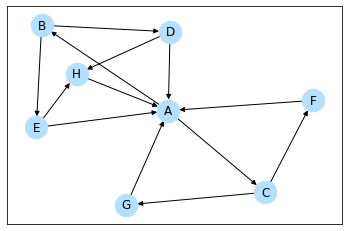

In [3]:
nx.draw_networkx(G, pos=nx.spring_layout(G),node_size=500,node_color="#b3e0ff")

To make our computation more convenient, we can represent the directed graph as a square matrix, in which if there is an edge from node A to node B, we give entry (A,B) a value of 1, otherwise 0. Apply the rule to the graph above, we have the matrix:

In [4]:
A = nx.adjacency_matrix(G).todense()
print("The adjacency matrix representation of A:")
print(A)

The adjacency matrix representation of A:
[[0 1 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


# The PageRank algorithm

To determine the importance of a webpage, we need to first assign a numerical value to each of the pages in our network. Let us call the importance of a webpage A the PageRank of A, denoted $PR(A)$.

Let the total PageRank of the network equal to 1, intially each page get the PageRank value of $1/n$, with $n$ be the total number of webpage in our network. We then perform the following iterative algorithm to calculate the PageRank of each webpage at step k.

We perform the sequence of k update as follow:

At each step, each page divides its current PageRank equally across its out-going links, and passes these equal shares to the pages it points to. (If a page has no out-going links, it passes all its current PageRank to itself.) Each page updates its new PageRank to be the sum of the shares it receives.

The code for the iterative algorithm of PageRank is presented below:

In [55]:
flow_table = []
current_flow = [1/8] * 8

def print_table(table):
    for i in table:
        print (i)

def page_rank_iterative(A, current_flow, num_iter):
    if num_iter <= 0:
        return
    flow_table.append(current_flow)
    next_flow = [0] * (len(A))
    for i in range(len(A)):
        num_outlink = 0
        for j in range(len(A)):
            if A[i,j] ==1:
                num_outlink += 1
        if num_outlink == 0:
            next_flow[i] += current_flow[i]
        else:
            flow = current_flow[i]/num_outlink
            for j in range(len(A)):
                if A[i,j] == 1:
                    next_flow[j] += flow
    page_rank_iterative(A, next_flow, num_iter - 1)
    
page_rank_iterative(A, current_flow, 10)
pd.DataFrame(flow_table, columns=['A','B','C','D','E','F','G','H'])

,A,B,C,D,E,F,G,H
0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
1,0.500000,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.125000
2,0.312500,0.250000,0.250000,0.031250,0.031250,0.031250,0.031250,0.062500
3,0.156250,0.156250,0.156250,0.125000,0.125000,0.125000,0.125000,0.031250
4,0.406250,0.078125,0.078125,0.078125,0.078125,0.078125,0.078125,0.125000
5,0.359375,0.203125,0.203125,0.039062,0.039062,0.039062,0.039062,0.078125
6,0.195312,0.179688,0.179688,0.101562,0.101562,0.101562,0.101562,0.039062
7,0.343750,0.097656,0.097656,0.089844,0.089844,0.089844,0.089844,0.101562
8,0.371094,0.171875,0.171875,0.048828,0.048828,0.048828,0.048828,0.089844
9,0.236328,0.185547,0.185547,0.085938,0.085938,0.085938,0.085938,0.048828


We can see that the PageRank value of all webpage seems to converge to some value, which brings us to the following definition:

Equilibrium Values of PageRank: As with hub-authority computations, one can prove that except in certain degenerate special cases the PageRank values of all nodes converge to limiting values as the number of update steps k goes to infinity.

Since the PageRank value of a page remains constant, we can also prove that the flow from one webpage to another also remain constant.

# Scaling of PageRank

Our algorithm seems to work for most cases, however, given the right kind of network, the basic PageRank algorithm can create some huge trouble.

Consider our network of 8 webpages. Let make a minor change to the graph, by pointing the outlinks of F and G to each other, instead of to A.

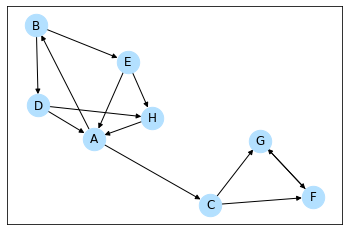

In [56]:
#Scaling the page-rank algorithm
G_scale = nx.DiGraph()
edge_list_scale = [('A', 'B'), ('A','C'),('B','D'),('B','E'),('C','F'),('C','G'),('D','H'),
             ('E','H'),('E','A'),('F','G'),('H','A'),('D','A'),('G','F')]
G_scale.add_edges_from(edge_list_scale)
nx.draw_networkx(G_scale, pos=nx.spring_layout(G_scale),node_size=500,node_color="#b3e0ff")

In [35]:
A_scale = nx.adjacency_matrix(G_scale).todense()
flow_table = []
current_flow = [1/8] * 8

page_rank_iterative(A_scale,current_flow, 10)
pd.DataFrame(flow_table, columns=['A','B','C','D','E','F','G','H'])

,A,B,C,D,E,F,G,H
0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
1,0.250000,0.062500,0.062500,0.062500,0.062500,0.187500,0.187500,0.125000
2,0.187500,0.125000,0.125000,0.031250,0.031250,0.218750,0.218750,0.062500
3,0.093750,0.093750,0.093750,0.062500,0.062500,0.281250,0.281250,0.031250
4,0.093750,0.046875,0.046875,0.046875,0.046875,0.328125,0.328125,0.062500
5,0.109375,0.046875,0.046875,0.023438,0.023438,0.351562,0.351562,0.046875
6,0.070312,0.054688,0.054688,0.023438,0.023438,0.375000,0.375000,0.023438
7,0.046875,0.035156,0.035156,0.027344,0.027344,0.402344,0.402344,0.023438
8,0.050781,0.023438,0.023438,0.017578,0.017578,0.419922,0.419922,0.027344
9,0.044922,0.025391,0.025391,0.011719,0.011719,0.431641,0.431641,0.017578


We can see that the PageRank value of the network slowly move towards F and G.

### How can we fix that?

By using a special scaling factor, $s$, we can prevent the problem above from happenning. We modify our initial algorithm to the following: At each step of the algorithm:

Scaled PageRank Update Rule: First apply the Basic PageRank Update Rule. Then scale down all PageRank values by a factor of s. This means that the total PageRank in the network has shrunk from 1 to s. We divide the residual $1 − s$ units of PageRank equally over all nodes, giving $\frac{1 − s}{n}$ to each.

Below is the implementation of the algorithm:

In [61]:
def page_rank_scaled(A, current_flow, num_iter, s):
    n = (len(A))
    if num_iter <= 0:
        for i in range (n):
            current_flow[i] = current_flow[i] * s + (1 - s)/n
        flow_table.append(current_flow)
        return
    flow_table.append(current_flow)
    next_flow = [0] * (len(A))
    for i in range(len(A)):
        num_outlink = 0
        for j in range(len(A)):
            if A[i,j] ==1:
                num_outlink += 1
        if num_outlink == 0:
            next_flow[i] += current_flow[i]
        else:
            flow = current_flow[i]/num_outlink
            for j in range(len(A)):
                if A[i,j] == 1:
                    next_flow[j] += flow
    for i in range (n):
            current_flow[i] = current_flow[i] * s + (1 - s)/n
    page_rank_scaled(A, next_flow, num_iter - 1, s)

In [64]:
flow_table = []
current_flow = [1/8] * 8

page_rank_scaled(A_scale,current_flow, 10, 0.8)
pd.DataFrame(flow_table, columns=['A','B','C','D','E','F','G','H'])

,A,B,C,D,E,F,G,H
0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
1,0.225000,0.075000,0.075000,0.075000,0.075000,0.175000,0.175000,0.125000
2,0.175000,0.125000,0.125000,0.050000,0.050000,0.200000,0.200000,0.075000
3,0.100000,0.100000,0.100000,0.075000,0.075000,0.250000,0.250000,0.050000
4,0.100000,0.062500,0.062500,0.062500,0.062500,0.287500,0.287500,0.075000
5,0.112500,0.062500,0.062500,0.043750,0.043750,0.306250,0.306250,0.062500
6,0.081250,0.068750,0.068750,0.043750,0.043750,0.325000,0.325000,0.043750
7,0.062500,0.053125,0.053125,0.046875,0.046875,0.346875,0.346875,0.043750
8,0.065625,0.043750,0.043750,0.039062,0.039062,0.360938,0.360938,0.046875
9,0.060937,0.045312,0.045312,0.034375,0.034375,0.370313,0.370313,0.039062


The scaling factor minimize the change in the PageRank when we add or delete more nodes to our network. However, there are still some disadvantages of the algorithm.


The Limit of the Scaled PageRank Update Rule: With each factor $s$ we choose, we end up with a different set of equilibrium PageRank.

# PageRank and Linear Algebra



In [ ]:
#Spectral analysis of PageRank

